# Adult dataset preprocessing and model training

For this assignment we are using the dataset availiable at https://archive.ics.uci.edu/ml/datasets/adult .
This contains information from the 1994 census database and the predicitive task is to determine wether a person makes less or more than 50k$ a year.

## Reading the data
The data is in csv format and does not contain a header so we have to add it manually.
The columns fnlwgt and educatio_num are removed. The first one is the final weight of that entry which we don't need since we will be making our own model and the second one is a integer mapping of the nominal feature education which we will also be making our own.
Any lines with missing data are removed from the dataset.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Adult/dataset/adult.data', engine='python', delimiter=', ',encoding='latin1', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'class']  
df.drop(labels=['fnlwgt', 'education_num'], axis=1, inplace=True)
df = df[df.workclass != '?']
df = df[df.occupation != '?']
df = df[df.native_country != '?']
df2 = df.copy(deep=True)
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocessing
The only preprocessing this dataset needs to be prepared for training a model is the removal of lines with missing values and the mapping of the categorical features to integer values.

In [7]:
#Dataset with categorical to integer mapping
mappings = {}
mappings['workclass'] = {'Private':0, 'Self-emp-not-inc':1, 'Self-emp-inc':1, 'Federal-gov':2, 'Local-gov':2, 'State-gov':2, 'Without-pay':3, 'Never-worked':3}
mappings['education'] = {'Preschool':0, '1st-4th':1, '5th-6th':2, '7th-8th': 3, '9th':4, '10th':5, '11th':6, '12th':7,'HS-grad':8, 'Prof-school':9, 'Assoc-acdm':10, 'Assoc-voc':11,'Some-college':12, 'Bachelors':13,  'Masters':14, 'Doctorate':8 }
mappings['marital_status'] = {'Married-civ-spouse':0, 'Divorced':1, 'Never-married':2, 'Separated':3, 'Widowed':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6}
mappings['occupation'] = {'Tech-support':0, 'Craft-repair':1, 'Other-service':2, 'Sales':3, 'Exec-managerial':4, 'Prof-specialty':5, 'Handlers-cleaners':6, 'Machine-op-inspct':7, 'Adm-clerical':8, 'Farming-fishing':9, 'Transport-moving':10, 'Priv-house-serv':11, 'Protective-serv':12, 'Armed-Forces':13}
mappings['relationship'] = {'Not-in-family':0, 'Husband':1, 'Wife':2, 'Own-child':3, 'Unmarried':4, 'Other-relative':5}
mappings['race'] = {'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4}
mappings['sex'] = {'Male':0, 'Female':1}
mappings['native_country'] = {'United-States':0, 'Cambodia':1, 'England':2, 'Puerto-Rico':3, 'Canada':4, 'Germany':5, 'Outlying-US(Guam-USVI-etc)':6, 'India':7, 'Japan':8, 'Greece':9, 'South':10, 'China':11, 'Cuba':12, 'Iran':13, 'Honduras':14, 'Philippines':15, 'Italy':16, 'Poland':17, 'Jamaica':18, 'Vietnam':19, 'Mexico':20, 'Portugal':21, 'Ireland':22, 'France':23, 'Dominican-Republic':24, 'Laos':25, 'Ecuador':26, 'Taiwan':27, 'Haiti':28, 'Columbia':29, 'Hungary':30, 'Guatemala':31, 'Nicaragua':32, 'Scotland':33, 'Thailand':34, 'Yugoslavia':35, 'El-Salvador':36, 'Trinadad&Tobago':37, 'Peru':38, 'Hong':39, 'Holand-Netherlands':40}
mappings['class'] = {'<=50K':0, '>50K':1}

for k in mappings:
    df[k] = df[k].map(mappings[k])
    
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,2,13,2,8,0,0,0,2174,0,40,0,0
1,50,1,13,0,4,1,0,0,0,0,13,0,0
2,38,0,8,1,6,0,0,0,0,0,40,0,0
3,53,0,6,0,6,1,1,0,0,0,40,0,0
4,28,0,13,0,5,2,1,1,0,0,40,12,0


## Normalization

To normalize the data we use sklearn's StandartScaler.
After the normalization process we use a PCA to rank our features and see if we there are any features that can be removed

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
y=df.as_matrix(columns=[df.columns[-1]])
X=df.as_matrix(columns=df.columns[:-1])

sc = StandardScaler()
X = sc.fit_transform(X)

## Dimension Reduction and Data Compression
For feature ranking we used a PCA and as can be seen from the graph all the features are pretty close in terms of relevancy, the lowest ranked feature has an explained variance ratio of 0.045 which means that if we remove it we loose about 4.5% of the information which is too much so all the features are deemed relevant and used to train the model.

We still mantained the PCA as it does compress the data, even though our dataset is not very big this is useful when using larger volumes of data.

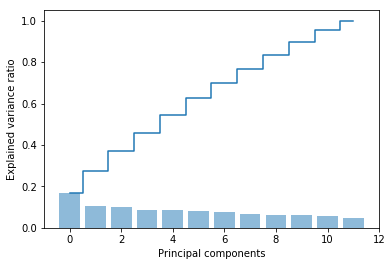

Lowest explained variance ratio: 0.04552347495186245


In [9]:
pca = PCA()
X = pca.fit_transform(X)


%matplotlib inline 
plt.bar(range(12), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(12), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

print("Lowest explained variance ratio: " + str(pca.explained_variance_ratio_[-1]))

## Classifier training and hold out testing

The classifiers in the next block are some examples of classifiers using hyperparamaters chosen in the next blocks and here we validade them using the holdout method by splitting the data into training and testing.
The train and test split is done with 80% of the data for training and 20% for testing with a fixed random seed which is the same for all the classifiers. This is done to ensure the results of these phase are always the same and to compare the 4 classifiers with exactly the same data.

We trained a Support Vector Machine with a polynomial kernel funcion of degree 3 and another one with a linear kernel function, a Random Forest and a Multi Layer Perceptron with non linear activation.


In [10]:
import time

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version


from numpy import linalg as LA
from matplotlib.colors import ListedColormap
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


start = time.time()
svm_class=SVC(C=8, max_iter=60000, tol=1e-06, kernel="poly", degree=3)
svm_class = svm_class.fit(X_train,y_train)
prediction_svm = svm_class.predict(X_test)
end = time.time()
print("SVM classifier:")
print("Accuracy (Score): {}".format(accuracy_score(y_test, prediction_svm)))
print(y_test)
print("Precision: {}".format(precision_score(y_test, prediction_svm)))
print("Recall: {}".format(recall_score(y_test, prediction_svm)))
print("Time (s): {}".format(end-start))

start = time.time()
random_forest_class = RandomForestClassifier(n_estimators=140, max_depth=10)
random_forest_class = random_forest_class.fit(X_train,y_train)
prediction_forest = random_forest_class.predict(X_test)
end = time.time()
print("\nRandom Forest classifier:")
print("Accuracy (Score): {}".format(accuracy_score(y_test, prediction_forest)))
print("Precision: {}".format(precision_score(y_test, prediction_forest)))
print("Recall: {}".format(recall_score(y_test, prediction_forest)))
print("Time (s): {}".format(end-start))

start = time.time()
mlp_class = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,), solver='lbfgs')
prediction_mlp = mlp_class.fit(X_train,y_train).predict(X_test)
end = time.time()
print("\nMLP classifier:")
print("Accuracy (Score): {}".format(accuracy_score(y_test, prediction_mlp)))
print("Precision: {}".format(precision_score(y_test, prediction_mlp)))
print("Recall: {}".format(recall_score(y_test, prediction_mlp)))
print("Time (s): {}".format(end-start))

start = time.time()
svm_linear_class=LinearSVC(C=1, max_iter=20000, tol=1e-06)
svm_linear_class = svm_linear_class.fit(X_train,y_train)
prediction_svm_linear = svm_linear_class.predict(X_test)
end = time.time()
print("\nLinear SVM classifier:")
print("Accuracy (Score): {}".format(accuracy_score(y_test, prediction_svm_linear)))
print("Precision: {}".format(precision_score(y_test, prediction_svm_linear)))
print("Recall: {}".format(recall_score(y_test, prediction_svm_linear)))
print("Time (s): {}".format(end-start))

SVM classifier:
Accuracy (Score): 0.8310956406431295
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]
Precision: 0.7348927875243665
Recall: 0.5023317788141239
Time (s): 12.82153582572937



Random Forest classifier:
Accuracy (Score): 0.8350737609812697
Precision: 0.7409523809523809
Recall: 0.5183211192538307
Time (s): 5.637295961380005



MLP classifier:
Accuracy (Score): 0.8463451019393337
Precision: 0.7274167987321711
Recall: 0.6115922718187875
Time (s): 2.1865012645721436



Linear SVM classifier:
Accuracy (Score): 0.8183325045582629
Precision: 0.7081192189105858
Recall: 0.4590273151232512
Time (s): 3.848494291305542


## Hyperparameter choice and Validation

### SVM classifiers
For the SVM classifiers the hyperparameter optimisation is done by extensivelly testing different combinations of values for C and tol. After some tests it was verified that the tol values that we were testing had no impact on the score so for efficiency and speed we decided to use only 1e-06. For these tests the number of iterations is unlimited until convergence. (this might take a while)

For validation we used the holdout method just like in the previous tests

In [9]:
C=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 100]
highest_score = 0
best_C = None
for c in C:
    test = LinearSVC(C=c, tol=1e-06).fit(X_train, y_train)
    score = test.score(X_test, y_test)
    if  score > highest_score:
        best_C = c
        highest_score = score
    #print("{}, {}".format(c, score))
            
print("Best hyperparameters for Linear SVM: C={}, with a score of {}".format(best_C, highest_score))


highest_score = 0
best_C = None
for c in C:
    test = SVC(C=c, tol=1e-06, kernel="poly").fit(X_train, y_train)
    score = test.score(X_test, y_test)
    if score > highest_score:
        best_C = c
        highest_score = score
    #print("{}, {}".format(c, score))
            
print("Best hyperparameters for SVM with polynomial function: C={} with a score of {}".format(best_C, highest_score))

Best hyperparameters for Linear SVM: C=12, with a score of 0.8218133598541356
Best hyperparameters for SVM with polynomial function: C=20 with a score of 0.8317586606994861


### Random Forest classifier
For the Random Forest Classifier the main hyperparameters that need tweaking are the number of estimators and the depth.
This time instead of iterating the different values we used sklearn's grid search function with k fold cross validation with the default value being 3 (this one also may take a while). Since we are using k fold cross validation the data split is handled by the grid search so we feed it the entire dataset.

In [11]:
from sklearn.model_selection import *

warnings.filterwarnings("ignore")

grid_forest_params = [{'n_estimators':[20, 40, 60, 100, 120, 140, 160], 'max_depth': [5,10,15,20]}]
grid_search_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_forest_params, cv=3)
grid_search_forest.fit(X, y)

print("Best Random Forest Score: {}".format(grid_search_forest.best_score_))
print("Best Random Forest Params: {}".format(grid_search_forest.best_estimator_.get_params()))

Best Random Forest Score: 0.840362044957231
Best Random Forest Params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 120, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Multi Layer Perceptron
For the Multi Layer Perceptron the main hyperparameters that need tweaking are the hidden layer sizes and the activation function.
For the solver we used only lbfgs since it converges much faster and perform better for smaller datasets (less than 100k samples) instead of the default adam solver.
This was also done with skelearn's Grid Search with k cross validation once again using 3 which is the default value.

In [13]:
grid_mlp_params = [{'hidden_layer_sizes': [(d, ) for d in [5, 10, 25, 50]], 'activation': ['relu', 'tanh', 'logistic', 'identity']}]
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(solver="lbfgs"), param_grid=grid_mlp_params, cv=3)
grid_search_mlp.fit(X, y)
print("Best MLP Score: {}".format(grid_search_mlp.best_score_))
print("Best MLP Params: {}".format(grid_search_mlp.best_estimator_.get_params()))

Best MLP Score: 0.8478549167827067
Best MLP Params: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


### Last notes on the validation scheme
The validation scheme used used for the Random Forest Classifier and the Multi Layer Perceptron is called K Cross-Validation.
This means that during the validation process the data is split into k different disjoin sets and all but one of these sets are used for training and the remaining one is used for testing and all the sets are used for testing once.

## Small test with our own data
Using the MLP Classifier which is the one with the highest score and our own personal info here is a small test to see if the classifier can guess if our annual income is above 50k by applying the same scaling and transformation to the input data we used in the dataset and as expected the classifier guessed correctly.

In [14]:
test_data = [[21, 3, 13, 2, 2, 0, 0, 0, 0, 0, 0, 21]]
test_data = sc.transform(test_data)
test_data = pca.transform(test_data)

print(mlp_class.predict(test_data))

[0]
